Question 3

Simulation using mathematical equations in python.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\3_body_weight_01.csv')  

print(df.head())

# Heifer Parameters
HM = Heifer_multiplier = 1
H_BWT = Heifer_max_body_weight = 588
H_DM_E = DM_energy = 2.3

# Lactation 1 parameters
C1 = lactation_1_age_at_calving = 730
A1 = lactation_1_mature_live_weight = 600
Y1 = lactation_1_birth_weight = 42
K1 = lactation_1_growth_rate_parameter = 3.9
p1L1 = lactation_1_maximum_decrease_of_liveweight_during_lactation = 20
p2L1 = lactation_1_time_during_lacatation_with_the_minimum_live_weight = 65
p3L1 = lactation_1_pregnancy_parameter = 0.02
M1 = multiplier = 1

# Lactation 2 parameters
C2 = lactation_1_age_at_calving = 1200
A2 = lactation_1_mature_live_weight = 640
Y2 = lactation_1_birth_weight = 42
K2 = lactation_1_growth_rate_parameter = 6
p1L2 = lactation_1_maximum_decrease_of_liveweight_during_lactation = 40
p2L2 = lactation_1_time_during_lacatation_with_the_minimum_live_weight = 70
p3L2 = lactation_1_pregnancy_parameter = 0.02
M2 = multiplier = 1

# woodmilk curve lactation 1
am1 = 15.6862
bm1 = 0.2081
cm1 = 0.0020
dm1 = 1
em1 = 0

# woodmilk curve lactation 2
am2 = 24.1895
bm2 = 0.1783
cm2 = 0.0031
dm2 = 1
em2 = 0

# woodfat curve lactation 1
af1 = 0.7131
bf1 = 0.1743
cf1 = 0.00183
df1 = 1
ef1 = 0

# woodfat curve lactation 2
af2 = 1.0558
bf2 = 0.1456
cf2 = 0.00283
df2 = 1
ef2 = 0

# woodprotein curve lactation 1
ap1 = 0.5209
bp1 = 0.1818
cp1 = 0.00190
dp1 = 1
ep1 = 0

# woodprotein curve lactation 2
ap2 = 0.8257
bp2 = 0.1464
cp2 = 0.00283
dp2 = 1
ep2 = 0

# somatic cell count lactation 1
ac1 = 1.9800
bc1 = -0.0030
cc1 = 0
dc1 = 16.8830
ec1 = 2
fc1 = 0

# somatic cell count lactation 2
ac2 = 2.5070
bc2 = -0.0040
cc2 = 0
dc2 = 8.9800
ec2 = 1
fc2 = 0

# Solution for the body weight

# adding new row for heifers
df['Predicted_BWT_Heifer'] = np.minimum(np.maximum(50, 28.115 + 6.2692 * df["week"] - 0.0117 * df["week"] ** 2), H_BWT) * HM
print(df.head())

# adding a new row for the Lactation 1
df['Lactation 1 Age'] = df['day'] + C1

df["Function (Lactation 1 Age)"] = (A1*(1-(1-(Y1/A1)**(1/3)) * np.exp(-K1 / 1000 * df["Lactation 1 Age"])) ** 3)

df["Function (Lactation 1 Lactation)"] = (p1L1/p2L1*df['day']*np.exp(1-df['day']/p2L1))

df["Predicted_BWT_Lact_1"] = (df["Function (Lactation 1 Age)"]- df["Function (Lactation 1 Lactation)"])*M1

print(df.head())

# adding a new row for the Lactation 2+
df['Lactation 2 Age'] = df['day'] + C2

df["Function (Lactation 2 Age)"] = (A2*(1-(1-(Y2/A2)**(1/3)) * np.exp(-K2 / 1000 * df["Lactation 2 Age"])) ** 3)

df["Function (Lactation 2 Lactation)"] = (p1L2/p2L2*df['day']*np.exp(1-df['day']/p2L2))

df["Predicted_BWT_Lact_2"] = (df["Function (Lactation 2 Age)"]- df["Function (Lactation 2 Lactation)"])*M2

print(df.head())


   week  day
0     1    4
1     2   11
2     3   18
3     4   25
4     5   32
   week  day  Predicted_BWT_Heifer
0     1    4               50.0000
1     2   11               50.0000
2     3   18               50.0000
3     4   25               53.0046
4     5   32               59.1685
   week  day  Predicted_BWT_Heifer  Lactation 1 Age  \
0     1    4               50.0000              734   
1     2   11               50.0000              741   
2     3   18               50.0000              748   
3     4   25               53.0046              755   
4     5   32               59.1685              762   

   Function (Lactation 1 Age)  Function (Lactation 1 Lactation)  \
0                  541.564250                          3.145903   
1                  543.085955                          7.767975   
2                  544.569412                         11.413464   
3                  546.015510                         14.233601   
4                  547.425119                 


# Solution for the DMI

In [8]:

# adding new row for heifers
df['Predicted_DMI_Heifer'] = df['Predicted_BWT_Heifer'] **0.75 *(0.2435* H_DM_E -0.0466*H_DM_E ** 2 - 0.1128)/H_DM_E 
print(df.head())

# Woodfat curve for the lactation 1
df["Predicted_milkfat_for_Lac_1"] = ((af1 * df['day'] ** bf1 * np.exp(-df['day'] * cf1)) + ef1) * df1
print(df["Predicted_milkfat_for_Lac_1"].head()) 

df["Predicted_milk_yield_for_Lac_1"] = ((am1 * df['day'] ** bm1 * np.exp(-df['day'] * cm1)) + em1) * dm1
print(df["Predicted_milk_yield_for_Lac_1"].head()) 

# Woodmilk curve for the lactation 2
df["Predicted_milk_yield_for_Lac_2"] = ((am2 * df['day'] ** bm2 * np.exp(-df['day'] * cm2)) + em2) * dm2
print(df["Predicted_milk_yield_for_Lac_2"].head())

# Woodfat curve for the lactation 2
df["Predicted_milkfat_for_Lac_2"] = ((af2 * df['day'] ** bf2 * np.exp(-df['day'] * cf2)) + ef2) * df2
print(df["Predicted_milkfat_for_Lac_2"].head()) 

# adding a new row for animals in the Lactation 1 DMI
df["Predicted_DMI_Lac_1"] = (0.372 * (0.4 * df["Predicted_milk_yield_for_Lac_1"] + 15 * df["Predicted_milkfat_for_Lac_1"]) + 0.0968 * df["Predicted_BWT_Lact_1"] ** 0.75) * (1 - np.exp(-0.192 * (df["week"] + 3.67)))
print(df["Predicted_DMI_Lac_1"].head()) 

# adding a new row for animals in the Lactation 1 DMI
df["Predicted_DMI_Lac_2"] = (0.372 * (0.4 * df["Predicted_milk_yield_for_Lac_2"] + 15 * df["Predicted_milkfat_for_Lac_2"]) + 0.0968 * df["Predicted_BWT_Lact_2"] ** 0.75) * (1 - np.exp(-0.192 * (df["week"] + 3.67)))
print(df["Predicted_DMI_Lac_2"].head()) 


   week  day  Predicted_BWT_Heifer  Lactation 1 Age  \
0     1    4               50.0000              734   
1     2   11               50.0000              741   
2     3   18               50.0000              748   
3     4   25               53.0046              755   
4     5   32               59.1685              762   

   Function (Lactation 1 Age)  Function (Lactation 1 Lactation)  \
0                  541.564250                          3.145903   
1                  543.085955                          7.767975   
2                  544.569412                         11.413464   
3                  546.015510                         14.233601   
4                  547.425119                         16.358918   

   Predicted_BWT_Lact_1  Lactation 2 Age  Function (Lactation 2 Age)  \
0            538.418347             1204                  639.165390   
1            535.317980             1211                  639.199704   
2            533.155949             1218          


# Solution for the lactation/ woodmilk curve

In [9]:

# Solution for the woodprotein curve
# Woodprotein curve for the lactation 1
df["Predicted_milkprotein_for_Lac_1"] = ((ap1 * df['day'] ** bp1 * np.exp(-df['day'] * cp1)) + ep1) * dp1
print(df["Predicted_milkprotein_for_Lac_1"].head()) 

# Woodprotein curve for the lactation 2
df["Predicted_milkprotein_for_Lac_2"] = ((ap2 * df['day'] ** bp2 * np.exp(-df['day'] * cp2)) + ep2) * dp2
print(df["Predicted_milkprotein_for_Lac_2"].head()) 

# Solution for the Somatic Cell Count
# Somatic Cell Count for the lactation 1
df["Predicted_SCC_for_Lac_1"] = ((ac1-bc1 * df["week"] + cc1 * df["week"] ** 2 / 2+ dc1/df["week"]) + fc1) * ec1
print(df["Predicted_SCC_for_Lac_1"].head()) 

# Somatic Cell Count for the lactation 2
df["Predicted_SCC_for_Lac_2"] = ((ac2-bc2 * df["week"] + cc2 * df["week"] ** 2 / 2+ dc2/df["week"]) + fc2) * ec2
print(df["Predicted_SCC_for_Lac_2"].head())


0    0.665133
1    0.788865
2    0.851354
3    0.891807
4    0.920419
Name: Predicted_milkprotein_for_Lac_1, dtype: float64
0    1.000110
1    1.137006
2    1.198040
3    1.232408
4    1.252698
Name: Predicted_milkprotein_for_Lac_2, dtype: float64
0    37.732000
1    20.855000
2    15.233333
3    12.425500
4    10.743200
Name: Predicted_SCC_for_Lac_1, dtype: float64
0    11.491000
1     7.005000
2     5.512333
3     4.768000
4     4.323000
Name: Predicted_SCC_for_Lac_2, dtype: float64


Question 4A
Integrated Dataframe

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r'C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\3_body_weight_01.csv')

# Heifer Parameters
H_BWT = 588
H_DM_E = 2.3

# Lactation 1 parameters
C1, A1, Y1, K1 = 730, 600, 42, 3.9
p1L1, p2L1, M1 = 20, 65, 1

# Lactation 2 parameters
C2, A2, Y2, K2 = 1200, 640, 42, 6
p1L2, p2L2, M2 = 40, 70, 1

# Woodmilk parameters
am1, bm1, cm1, dm1 = 15.6862, 0.2081, 0.0020, 1
am2, bm2, cm2, dm2 = 24.1895, 0.1783, 0.0031, 1

# Woodfat parameters
af1, bf1, cf1, df1 = 0.7131, 0.1743, 0.00183, 1
af2, bf2, cf2, df2 = 1.0558, 0.1456, 0.00283, 1

# Woodprotein parameters
ap1, bp1, cp1, dp1 = 0.5209, 0.1818, 0.00190, 1
ap2, bp2, cp2, dp2 = 0.8257, 0.1464, 0.00283, 1

# Somatic Cell Count parameters
ac1, bc1, dc1, ec1 = 1.9800, -0.0030, 16.8830, 2
ac2, bc2, dc2, ec2 = 2.5070, -0.0040, 8.9800, 1

# Body Weight Calculations
df['Predicted_BWT_Heifer'] = np.minimum(np.maximum(50, 28.115 + 6.2692 * df["week"] - 0.0117 * df["week"] ** 2), H_BWT)
df['Lactation 1 Age'] = df['day'] + C1
df['Lactation 2 Age'] = df['day'] + C2

df['Predicted_BWT_Lact_1'] = (A1 * (1 - (1 - (Y1/A1)**(1/3)) * np.exp(-K1 / 1000 * df['Lactation 1 Age'])) ** 3 - (p1L1 / p2L1 * df['day'] * np.exp(1 - df['day'] / p2L1))) * M1
df['Predicted_BWT_Lact_2'] = (A2 * (1 - (1 - (Y2/A2)**(1/3)) * np.exp(-K2 / 1000 * df['Lactation 2 Age'])) ** 3 - (p1L2 / p2L2 * df['day'] * np.exp(1 - df['day'] / p2L2))) * M2

# Dry Matter Intake (DMI) Calculations
df['Predicted_DMI_Heifer'] = df['Predicted_BWT_Heifer'] ** 0.75 * (0.2435 * H_DM_E - 0.0466 * H_DM_E ** 2 - 0.1128) / H_DM_E
df['Predicted_DMI_Lac_1'] = (0.372 * (0.4 * df.get("Predicted_milk_yield_for_Lac_1", 0) + 15 * df.get("Predicted_milkfat_for_Lac_1", 0)) + 0.0968 * df['Predicted_BWT_Lact_1'] ** 0.75) * (1 - np.exp(-0.192 * (df['week'] + 3.67)))
df['Predicted_DMI_Lac_2'] = (0.372 * (0.4 * df.get("Predicted_milk_yield_for_Lac_2", 0) + 15 * df.get("Predicted_milkfat_for_Lac_2", 0)) + 0.0968 * df['Predicted_BWT_Lact_2'] ** 0.75) * (1 - np.exp(-0.192 * (df['week'] + 3.67)))

# Milk Production Curves
df['Predicted_milk_yield_for_Lac_1'] = ((am1 * df['day'] ** bm1 * np.exp(-df['day'] * cm1)) * dm1)
df['Predicted_milk_yield_for_Lac_2'] = ((am2 * df['day'] ** bm2 * np.exp(-df['day'] * cm2)) * dm2)

df['Predicted_milkfat_for_Lac_1'] = ((af1 * df['day'] ** bf1 * np.exp(-df['day'] * cf1)) * df1)
df['Predicted_milkfat_for_Lac_2'] = ((af2 * df['day'] ** bf2 * np.exp(-df['day'] * cf2)) * df2)

df['Predicted_milkprotein_for_Lac_1'] = ((ap1 * df['day'] ** bp1 * np.exp(-df['day'] * cp1)) * dp1)
df['Predicted_milkprotein_for_Lac_2'] = ((ap2 * df['day'] ** bp2 * np.exp(-df['day'] * cp2)) * dp2)

# Somatic Cell Count (SCC) Calculations
df['Predicted_SCC_for_Lac_1'] = ((ac1 - bc1 * df['week'] + dc1 / df['week']) * ec1)
df['Predicted_SCC_for_Lac_2'] = ((ac2 - bc2 * df['week'] + dc2 / df['week']) * ec2)

# Print final integrated dataframe
print(df)


QUESTION 4

Find the Cumulative Milk yield and protein yield of Lac 1 and 2 cows

In [13]:

# Cumulative sum Milkyield Lac 1
Cum_Milkyield_Lac1 = df['Predicted_milk_yield_for_Lac_1'].cumsum()

print(Cum_Milkyield_Lac1)

# Cumulative sum for Milk yield Lac 2
Cum_Milkyield_Lac2 = df['Predicted_milk_yield_for_Lac_2'].cumsum()

print(Cum_Milkyield_Lac2)

# Cumulative sum for Milk Protein Lac 1
Cum_MilkProtein_Lac1 = df['Predicted_milkprotein_for_Lac_1'].cumsum()

print(Cum_MilkProtein_Lac1)

# Cumulative sum for Milk Protein Lac 2
Cum_MilkProtein_Lac2 = df['Predicted_milkprotein_for_Lac_2'].cumsum()

print(Cum_MilkProtein_Lac2)

0        20.765007
1        46.039187
2        73.651664
3       102.806751
4       133.072025
          ...     
195    3399.988068
196    3405.111587
197    3410.235106
198    3415.358625
199    3420.482144
Name: Predicted_milk_yield_for_Lac_1, Length: 200, dtype: float64
0        30.590666
1        66.441377
2       104.742221
3       144.481664
4       185.117867
          ...     
195    2827.148150
196    2828.664903
197    2830.181656
198    2831.698409
199    2833.215163
Name: Predicted_milk_yield_for_Lac_2, Length: 200, dtype: float64
0        0.665133
1        1.453998
2        2.305351
3        3.197158
4        4.117577
          ...    
195    101.706236
196    101.866773
197    102.027310
198    102.187847
199    102.348383
Name: Predicted_milkprotein_for_Lac_1, Length: 200, dtype: float64
0       1.000110
1       2.137115
2       3.335155
3       4.567563
4       5.820261
         ...    
195    89.410374
196    89.468968
197    89.527562
198    89.586156
199    89.64475

QUESTION 5
Slicing etc.

c:\Users\adeolu.adekunle\.conda\envs\Adeolujoe\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


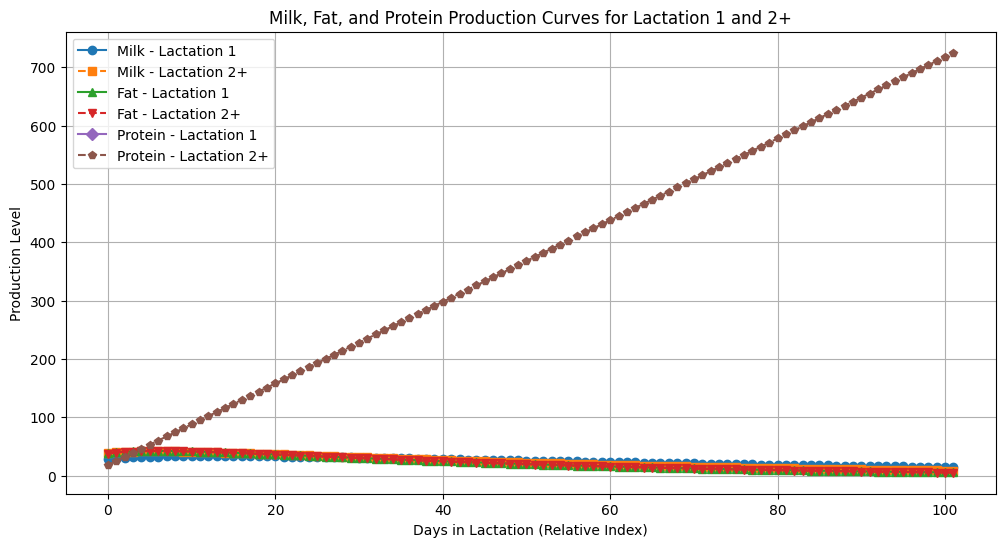

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
xls = pd.ExcelFile(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Mastitis Economics\Dairy_Modeling_Data.xlsx")

# Load the relevant sheet
df = pd.read_excel(xls, sheet_name='dairyplan25')

# Extract relevant rows (17 to 120, adjusting for zero-based indexing)
df_sliced = df.iloc[17:121].reset_index(drop=True)

# Extract relevant columns based on approximate positions
milk_columns = [47, 48]  # Milk for lactation 1 and 2+
fat_columns = [53, 54]   # Fat for lactation 1 and 2+
protein_columns = [59, 60]  # Protein for lactation 1 and 2+

df_production = df_sliced.iloc[:, milk_columns + fat_columns + protein_columns]

# Rename columns for clarity
df_production.columns = ['Milk_Lact1', 'Milk_Lact2+', 'Fat_Lact1', 'Fat_Lact2+', 'Protein_Lact1', 'Protein_Lact2+']

# Convert data to numeric values
df_production = df_production.apply(pd.to_numeric, errors='coerce')

# Plot the production curves
plt.figure(figsize=(12, 6))

# Plot Milk Production
plt.plot(df_production.index, df_production['Milk_Lact1'], label="Milk - Lactation 1", linestyle='-', marker='o')
plt.plot(df_production.index, df_production['Milk_Lact2+'], label="Milk - Lactation 2+", linestyle='--', marker='s')

# Plot Fat Production
plt.plot(df_production.index, df_production['Fat_Lact1'], label="Fat - Lactation 1", linestyle='-', marker='^')
plt.plot(df_production.index, df_production['Fat_Lact2+'], label="Fat - Lactation 2+", linestyle='--', marker='v')

# Plot Protein Production
plt.plot(df_production.index, df_production['Protein_Lact1'], label="Protein - Lactation 1", linestyle='-', marker='D')
plt.plot(df_production.index, df_production['Protein_Lact2+'], label="Protein - Lactation 2+", linestyle='--', marker='p')

# Labels and title
plt.xlabel("Days in Lactation (Relative Index)")
plt.ylabel("Production Level")
plt.title("Milk, Fat, and Protein Production Curves for Lactation 1 and 2+")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()